In [1]:
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning) 
simplefilter("ignore", category=UserWarning)
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.gating.defaults import ChildPopulationCollection
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
pd_init()

In [2]:
texp = FCSExperiment.objects(experiment_id='PD_T_PBMCs').get()

In [3]:
t = Template(texp, '294-02_pbmc_t', include_controls=False)

In [4]:
t.load_template('PBMCt_Preprocessing')

True

Applying boundary...
------ boundary ------
New population: cells
...proportion of total events: 0.679
...proportion of parent: 0.679
New population: debris
...proportion of total events: 0.321
...proportion of parent: 0.321
-----------------------
Applying CD3_gate...
------ CD3_gate ------
New population: CD3+
...proportion of total events: 0.381
...proportion of parent: 0.561
New population: CD3-
...proportion of total events: 0.298
...proportion of parent: 0.439
-----------------------
Applying live_gate...
------ live_gate ------
New population: dead
...proportion of total events: 0.299
...proportion of parent: 0.785
New population: live
...proportion of total events: 0.082
...proportion of parent: 0.215
-----------------------
Applying singlets1_gate...
------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.080
...proportion of parent: 0.978
New population: doublets1
...proportion of total events: 0.002
...proportion of parent: 0.022
-------------

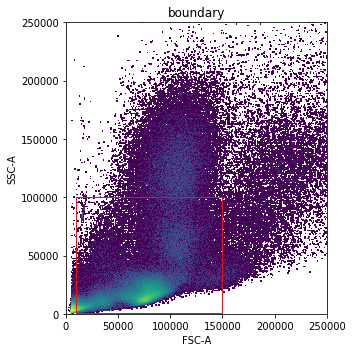

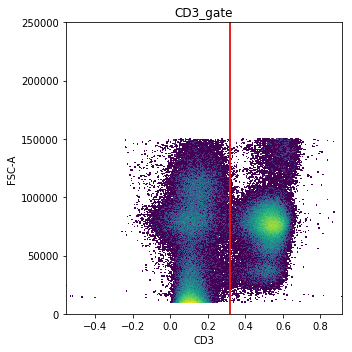

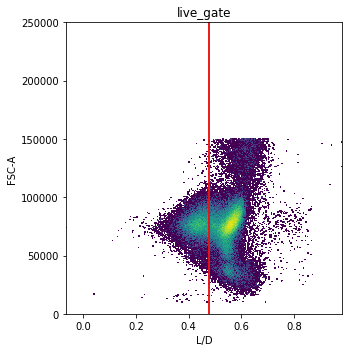

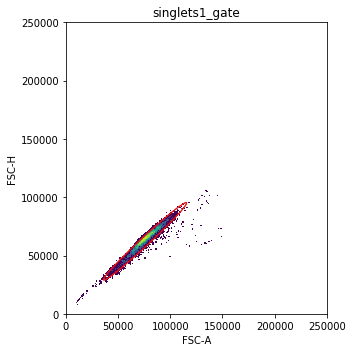

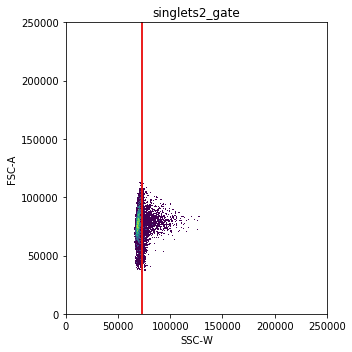

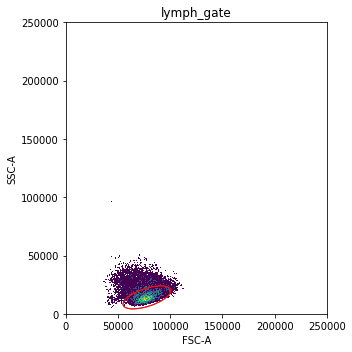

In [5]:
t.apply_many(apply_all=True, plot_outcome=True)

In [6]:
t.populations['live'].geom

{'method': 'Local minima between pair of highest peaks',
 'threshold': 0.4761029816002179,
 'shape': 'threshold',
 'x': 'L/D',
 'y': None}

In [7]:
new_geom = t.populations['live'].geom
new_geom['threshold'] = 0.6
new_geom = {'live': new_geom, 'dead': new_geom}

In [8]:
t.edit_gate('live_gate', updated_geom=new_geom)

Editing gate: live_gate
Updating dead
Updating live
The following gates are downstream of live_gate and will need to be applied again: ['singlets1_gate', 'singlets2_gate', 'lymph_gate']
Edit complete!


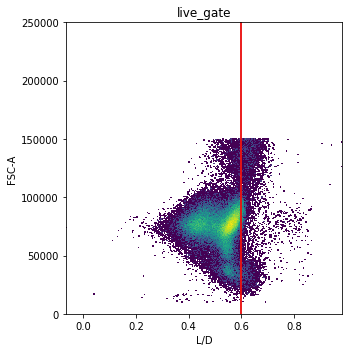

In [12]:
t.plotting.plot_gate('live_gate')

------ singlets1_gate ------
New population: singlets1
...proportion of total events: 0.322
...proportion of parent: 0.845
New population: doublets1
...proportion of total events: 0.059
...proportion of parent: 0.155
-----------------------


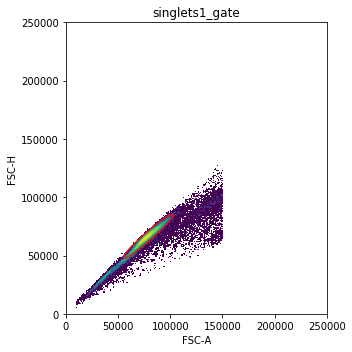

In [9]:
t.apply('singlets1_gate')

------ singlets2_gate ------
New population: doublets2
...proportion of total events: 0.015
...proportion of parent: 0.047
New population: single_Live_CD3+
...proportion of total events: 0.306
...proportion of parent: 0.953
-----------------------


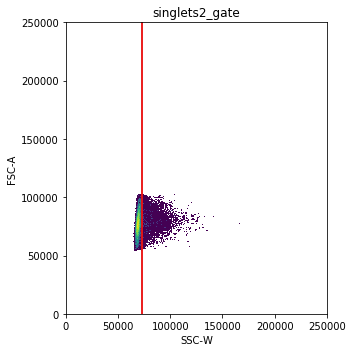

In [10]:
t.apply('singlets2_gate')

------ lymph_gate ------
New population: Lymphocytes
...proportion of total events: 0.263
...proportion of parent: 0.858
New population: other cells
...proportion of total events: 0.043
...proportion of parent: 0.142
-----------------------


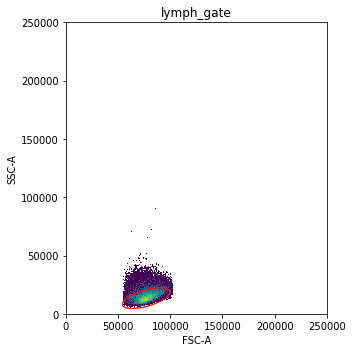

In [11]:
t.apply('lymph_gate')

In [13]:
t.save(overwrite=True)

Saved successfully!


True